# Image analysis notebook



## Introduction

Image analysis is an important part of materials science. Microstructures, or morphologies are often imaged using microscopes and often we are interested in quantifying, that is, measuring different features. These could be pore areas, cell sizes, fibre lengths, grain sizes, crack widths etc. In some cases we might be interested in analysing the image of a spectrum or a diffraction pattern for example. Here is a gratuitously pretty image of the microstruture of a 3D printed aerospace titanium alloy:

![3D printed Ti Alloy Microstructure](http://www.cl.eps.manchester.ac.uk/medialand/chem_eng/images/research/facilities-institutes/emc-1_340x140.jpg)

Since it is now easy to digitise images, it is easy to exploit the power of computers to process and analyse them. Digital image processing is a big subject and there are many [multi-volume books](http://www.springer.com/us/book/9781848001909) dedicated to image processing techniques. For general image processing, it's often easier to use a dedicated image processing program like the excellent [imageJ](http://imagej.net/Welcome), for example. 

In this notebook, we will use python to do some simple image processing and analysis. The aim is to understand how digital images are structured and to explore how the power of python and its packages can be used to make scientific measurements on images.

As usual, we start by importing the usual useful python modules <code>numpy</code> and <code>matplotlib</code>:

In [1]:
#impot libraries 



For this notebook we also suppress warnings. This doesn't interfere with the code and avoids confusing warning (not error) messages:

In [2]:
# ignore warnings 



## Images as arrays

The first step in working with digital images is to get used to the idea that images are just arrays of numbers. For example, the next array might not mean much to you: 

In [3]:
mysterious =np.array(
[[125,118,115,117,122,118,122,131,130,121,122,130,126,121,123,120,129,128],
 [140,134,130,128,132,140,137,132,136,137,136,140,133,128,130,130,132,133],
 [143,147,141,136,146,117, 57, 24, 40, 69,117,146,136,130,136,138,139,144],
 [156,153,145,159,128, 59,105, 64, 13,  0,  0,129,153,139,144,151,152,145],
 [164,159,159,162, 91,179,198,163, 75, 17,  0, 57,157,158,159,158,159,156],
 [175,165,173,128,102,193,196,177,118, 61, 19,  0,115,141,152,156,162,165],
 [158,181,182, 72, 97,161,170,131,115, 68, 10,  0, 56, 92,117,131,160,167],
 [100,158,146, 51, 83,117,126,101,101, 89,  0,  9, 40, 67, 81, 81,155,168],
 [ 65, 70, 66,  0,133,178,143,166,168, 84,  0, 13, 32, 74, 83, 75,132,147],
 [ 54, 49, 37,  0, 96,162,108,145,123, 33, 14, 12, 19, 50, 68, 73, 88, 91],
 [ 53, 48, 38, 17, 45,137, 96,101, 97, 36, 12, 11, 18, 37, 40, 34, 45, 60],
 [ 44, 51, 54, 37,  0,105,146, 88, 62, 26, 15,  9, 18, 45, 53, 49, 54, 54],
 [ 60, 77, 78, 33, 16,  0, 70, 33, 12, 28, 19, 11, 13, 36, 50, 47, 42, 33],
 [ 77, 89, 79, 33, 27,  0, 53, 87, 56, 75, 41,  6, 18, 32, 58, 61, 60, 72],
 [ 50, 42, 38, 23,  4, 29,113,134,125,131, 77, 20, 31, 12, 34, 54, 78, 97],
 [ 38, 20, 25,  0, 47,148,182,174,175,161, 90, 41, 29,  5, 13, 87,111, 86],
 [ 50, 45, 26,  0,113,193,197,187,188,162, 88, 31, 27, 56, 33, 38, 82, 98],
 [ 77, 33,  0, 93,181,196,198,199,193,167, 88, 68, 94, 83, 46,  1, 16, 52],])

We will now use <code> matplotlib </code> to plot it. We are going to use the `imshow` function, which is similar to the `matshow` function we used in the first week to plot matrices. Do you recognise the image?

In [87]:
# show the array



<div class="alert alert-success"> 
Notice how, in the `imshow` command above, we *pass on* two arguments: `cmap` and `interpolation`. These are options in `imshow` that tell the function to use a grayscale to represent the values of the array and to not interpolate the image.

Usually, you can find out what kind of arguments a function uses by calling up the documentation string of the function, with the question mark magic:
<div>

In [86]:
#plt.imshow?




Most functions will have a signature that lists all the possible arguments. As you can see `imshow` has many arguments, and they are all optional. You don't need to know all these options, not many people do! You will discover them as you use different functions more and more, and what you want to achieve changes.
<div>

### Back to image analysis

In this image each pixel corresponds to one value, ranging from 0 to 256. We can plot a histogram that shows the distribution of values making up the image:

In [59]:
# Histogram 



Here we use `.flatten` to flatten the array into a 1D array for plotting the histogram. Otherwise the `hist` function will try to plot a histogram for each row. Try it!

The point is that an image is just an array of intensity values and can be plotted using any "colour scale" by using different colour maps. For example with <code>jet</code> it looks like this:

In [58]:
# colour maps



This time we have added a `colorbar` to the plot. This shows how the colours relate to the intensity values in the arrays. 
As you can see the choice of color map can significantly change your image. Mona Lisa in <code>jet</code> doesn't really look like Mona Lisa. Let's try another color map, <code>bone</code>:

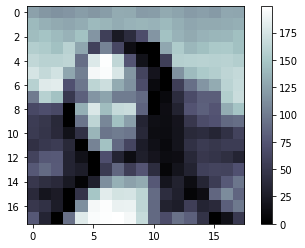

In [7]:
# colour bar



You can list all available colourmaps by running the `colormaps` command: 



In [61]:
#plt.colormaps()


There are rather a lot. You might prefer to browse them [here](http://matplotlib.org/examples/color/colormaps_reference.html).

### <span style="color: red"> Task 1:</span> Display the `mysterious` array using a different colormap of your choice:

### <span style="color: blue"> Solution:</span>

## Image formats

Although all images are all ultimately arrays of pixels, image files can store this information in a number of ways, or formats. In some cases all the values are stored without loss (e.g. .bmp and .tif) but these files can quickly become unfeasibly large. Instead, files are usually stored in "lossy" compressed formats (e.g. .jpg and .png). These formats contain the intensity values in encoded, compressed format and the image needs to be decoded using an algorithm. Opening such files can therefore be difficult, but because we are using Python ...wait for it... *there is a package for that.*


We are going to use the scikit-image package, called [skimage](http://scikit-image.org/docs/dev/api/skimage.html). To open image files, we need the input/output <code>io</code> subpackage:

In case you come across with "no module named skimage" error, please do install the library with the following comment :`pip3 install scikit-image`.

In [62]:
# import libraries



Then, opening an image in any standard format is only one command away: 

In [63]:
# read th image from the folder



We can then plot it using <code>matplotlib</code>:

In [64]:
# show the image via matplotlib



In [65]:
# rgb2gray



In [67]:
# dimensions of the image



In [68]:
#plot


We can also use the `imshow` function from `skimage` to plot the image.

In [69]:
# plt vs. io



The function `imshow` from `skimage` does not rescale the intensity levels. What does this mean? Whereas `imshow` from `matplotlib` will give you the best view of the data by using the full colourscale and setting the minimum value to black and he maximum to white, `imshow` from `skimage` shows you the most faithful representation of the image by setting 0 to black and 255 (the highest intensity for an 8-bit image: $2^8=256$) to white. This way the original look of the image is preserved. In this case they are almost the same but dark and bright images would look very different.

### <span style="color: red"> Task 2:</span> Crop the large Mona Lisa image above just below the neck and display it using <code>io.imshow</code>

**Tip:** use the array slicing you learned in the "Introduction to Python" workbook to select the columns and rows you want.

### <span style="color: blue"> Solution:</span>

## Analysing images

Now we'll look at some images that might be more interesting to materials scientists.

Many of the PhD students at the IMM have been investigating creep-resistant magnesium alloys. Indeed, Prof. Korte-Kerzel's recently-funded SFB (SFB 1394) will also focus on this material system.

Here is an SE image of the microsctructure of such a creep-resistant alloy (Mg-5Al-3Ca). Read the image file in with the `io.imread` function from `skimage` and display it:

In [70]:
# Load the image and show



The creep-resistance in this alloy comes from the intermetallic skeleton, which slows down diffusion and help prevents grain boundary sliding. However, this intermetallic is macroscopically brittle, so our research focusses on understanding its intrinsic mechanical properties, as well as how plastic deformation is transferred between the soft but ductile magnesium grains to the hard but brittle intermetallic Laves phases.

These Laves phases are the light-coloured part of the image. For simplicity, we'll pretend there is only one type of Laves phase present, giving us a two-phase microsctructure.

The strength and creep-resistance of this alloy depends in part on how much Laves phase is actually present, so we would like some way to quantify this.

We can zoom into any region of the image to take a closer look. First it's useful to see how many rows and columns our image has. To do this we use the function `shape` from `numpy`:

In [71]:
# dim.s of image



The function tells us the image is 743 pixels high, 899 pixels wide and 3 high.

#### <span style="color:red">Question: What is the "3" referring to?</style>

### <span style="color: blue"> Solution:</span>

This third dimension will cause some problems later on when we do the thresholding tasks. As there is no colour information that we care about at the moment, let's import an image saved as a grayscale image, with no colour information: "MgAlCa_gray.png".

Read the image file in with the `io.imread` function from `skimage`, display it, and check out the shape:

In [73]:
# grey MgAlCa



You can see the image looks identical to the one above (this makes sense as it's still gray). But, importantly our RGB values have been replaced by a simple intensity value, leaving us with a 2D array, 743 pixels high by 899 pixels wide.

Note we have also overwritten our inital `alloy` variable with this new, gray one.

Let's now display the top-left 50$\times$50 pixels, using the array slicing commands we learnt in the 'Introduction to Python' workbook.

In [74]:
# Zoom in




### <span style="color: red"> Task 3:</span>  Use array slicing to plot different regions of the image and identify a region where the two phases are clear and representative.

### <span style="color: blue"> Solution:</span>

As you can see the Laves phases are mostly white or light grey but have darker borders and are embedded in a matrix which has some other shades of grey.

If we could find a way of counting just the light pixels, that would give us the area fraction of Laves phase, wouldn't it?

Lets use the function <code>histogram</code> from the <code>exposure</code> subpackage from <code>skimage</code> to plot the distribution of grey scale values. First, we import the subpackage exposure:

In [75]:
# exposure



Now we can plot the histogram. We are using a new `matplolib` function called `fill_between`. Do you know what it does? How can you find out?

In [76]:
# histogram of exposure




The histogram shows the distribution of grey scale values, with 0 corresponding to black and 255 to white. As you can see there are no black pixels and there is a spiked distribution around an intensity of 50. There is also a small but very sharp peak at 256. Can you explain where it comes from?

## Separating the Laves phase from the matrix - thresholding

In order to measure the amount of Laves phase, we need to first be able to separate it from the matrix. We know that it is generally light in colour, therefore we need to find a way of separating these pixels from the rest.

We need to create a boolean (true/false) array, which is 1 when the pixels are light (intensity > (a certain value)) and 0 when the pixels are not. Using <code>numpy</code>, this is easy. We assign a new array, called `light_pixels` to the result of the comparison between our image and the value 70, which we'll use as a first guess.

In [77]:
# thresh




This process is called _**thresholding**_. Lets display the resultant boolean array. This is not an image, but an array of true false. We can use `imshow` from `matplotlib` to display it:

In [78]:
# show


To see if we've been successful in separating the particles, we should compare the image of the boolean array with the original image, side by side using <code>subplots</code> from <code>matplotlib</code>:

In [79]:
# apply thresh




<div class="alert alert-success">
In the cell above, we have used an advanced form of plotting that enables us to display more than one set of plots in one figure. First we create the subplots using `plt.subplots`, which specifies the number of rows and columns we need (1,2 in this case). We also use the `figsize` argument to change the size of the figure (16,9 in this case for widescreen!). When we call the `subplots` function we assign two new variables: `f`, which is a handle to the figure, and `images` which is a list of all the subplots in the figure. To plot in each of the subplots, we run the plotting functions on each subplot. So `image[0].imshow(array)` will display `array` in the first subplot, `image[1].imshow(array)` in the second etc.
<div>

### Back to image analysis

It's easier to compare the images if we zoom in:

In [81]:
# Zoom in



It appears that although we have managed to separate some of the Laves phase, we have not picked up all of it. This means our threshold value of 70 is too high. 

### <span style="color: red"> Task 4:</span> Use different values of threshold to separate the Laves phase and choose the one you think best represents the microstructure in the original image

### <span style="color: blue"> Solution:</span>

## Automatic thresholding

As you can see it's not easy to determine the "ideal" threshold and different people will choose different values. This makes thresholding problematic because it depends on the user, i.e. it is subjective.

To avoid this, we can use an automatic thresholding algorithm, like [Otsu's method](https://en.wikipedia.org/wiki/Otsu%27s_method), which we can also find in <code>skimage</code>:

In [82]:
# Automatic thresh lib





Let's see what Otsu's method gives us:

In [84]:
# print thresh



Let's see what this threshold value gives now in terms of the images:

In [85]:
# subplots




How well do you think the Otsu thresholding does?

#### <span style="color: red"> Question:</span> Even if this is "worse" than the value you found, why might we want to use it anyway?

#### <span style="color: blue"> Answer:</span> 
